Dataset obtained from [UCI Machine Learning Dataset : Wine Quality Data Set ](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [2]:
df_red = pd.read_csv('winequality-red.csv')
df_red.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


As the delimiter given in the given CSV file is different i.e., ';' here use `sep = ';'` to obtain this correctly

In [3]:
df_red = pd.read_csv('winequality-red.csv', sep =';')
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_white = pd.read_csv('winequality-white.csv', sep =';')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Reading CSV files isn't always the same process - you won't always know what to expect. Sometimes there could be different delimiters, missing column labels, blank lines, comments, header text, etc. Most of the time, quick trial and error with Pandas does the trick. Alternatively, you can inspect the file with a text editor or spreadsheet program, like Google Sheets. Although, this is not recommended for large files, as they could really slow or crash the program. A [better way](https://askubuntu.com/questions/261900/how-do-i-open-a-text-file-in-my-terminal) to inspect large files would be with your terminal. (You don't need to know about this for this lesson.)

In [5]:
# number of samples in each dataset
df_red.shape

(1599, 12)

In [6]:
# How many samples of white wine are there?
df_white.shape

(4898, 12)

Which features have missing values?

Ans : None

In [7]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
# How many duplicate rows are in the white wine dataset?
sum(df_white.duplicated())

937

Are duplicate rows in these datasets significant/ need to be dropped?  : Not necessarily

In [10]:
# How many unique values of quality are in the red wine dataset?

df_red['quality'].nunique()

6

In [11]:
# How many unique values of quality are in the white wine dataset?

df_white['quality'].nunique()

7

In [12]:
# What is the mean density in the red wine dataset?
df_red['density'].mean()

0.9967466791744833

# Combining 2 dataframes
## 1. Creating new column using Pandas

In [13]:
#df_red['color'] = 'Red'
#df_red.head()

In [14]:
#df_white['color']  = 'White'
#df_white.head()

## 2. Creating new column using NumPy

In [21]:
df_red.shape[0]  # gives the number of rows

1599

In [22]:
color_red = np.repeat('Red',df_red.shape[0] )
color_red

array(['Red', 'Red', 'Red', ..., 'Red', 'Red', 'Red'],
      dtype='<U3')

In [23]:
len(color_red)

1599

In [24]:
color_white = np.repeat('White',df_white.shape[0])

In [25]:
len(color_white)

4898

In [26]:
df_red['color'] = color_red
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [27]:
df_white['color'] = color_white
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


## Combine DataFrames with Append
Check the documentation for [Pandas' append](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html) function and see if you can use this to figure out how to combine the dataframes. (Bonus: Why aren't we using the [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) method to combine the dataframes?) If you don’t get it, I’ll show you how afterwards. Make sure to save your work in this notebook! You'll come back to this later.

In [28]:
wine_df = df_red.append(df_white, ignore_index = True)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [31]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,White


In [29]:
wine_df.shape

(6497, 13)

In [30]:
# Saving this new df to csv
wine_df.to_csv('winequality_edited.csv', index = False)

### Exploring with Visuals
Use the notebook below to perform exploratory data analysis on your newly combined dataframe. Create some visuals to answer these quiz questions below the notebook.


In [32]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

### Histograms

Based on histograms of columns in this dataset, which of the following feature variables appear skewed to the right? _Fixed Acidity, Total Sulfur Dioxide, pH, Alcohol_  



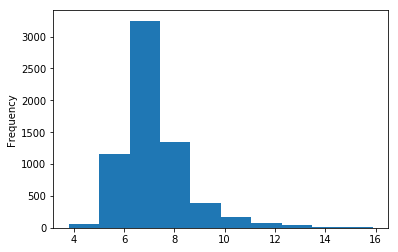

In [33]:
wine_df['fixed acidity'].plot(kind = 'hist');

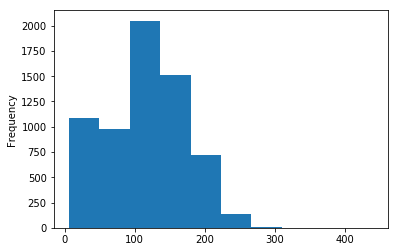

In [34]:
wine_df['total sulfur dioxide'].plot(kind = 'hist');

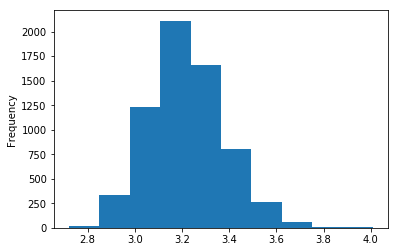

In [35]:
wine_df['pH'].plot(kind = 'hist');

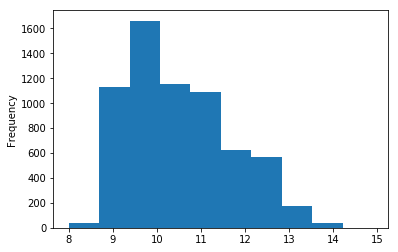

In [36]:
wine_df['alcohol'].plot(kind = 'hist');

### Sactterplot
Based on scatterplots of quality against different feature variables, which of the following is most likely to have a positive impact on quality? _Volatile Acidity, Residual Sugar, pH, Alcohol_

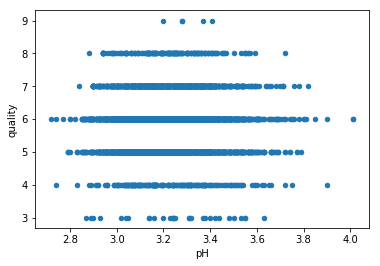

In [39]:
wine_df.plot(x = 'pH', y = 'quality', kind = 'scatter');

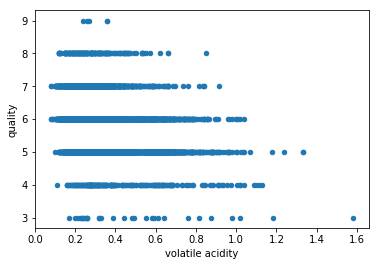

In [40]:
wine_df.plot(x = 'volatile acidity', y = 'quality', kind = 'scatter');

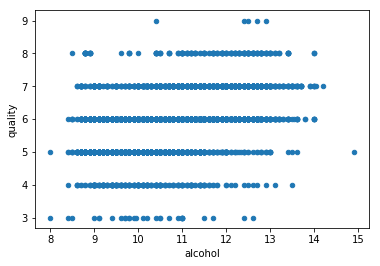

In [41]:
wine_df.plot(x = 'alcohol', y = 'quality', kind = 'scatter');

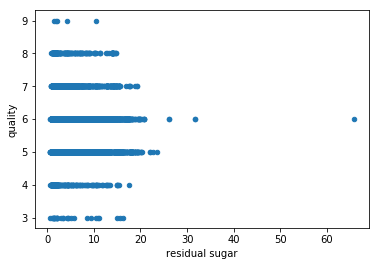

In [42]:
wine_df.plot(x = 'residual sugar', y = 'quality', kind = 'scatter');

Now that you've cleaned and learned more about your data, you can start drawing conclusions based on the questions from the quiz at the beginning of this lesson. In order to perform the analysis for these conclusions, let’s learn about two helpful functions in Pandas that you'll be using - groupby and query.

In [43]:
wine_df.mean()

fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64

Using groupby function to get summary statistics of different groups in data

In [44]:
wine_df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [45]:
wine_df.groupby(['quality', 'color']).mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality color                                                                 
3       Red         8.360000          0.884500     0.171000        2.635000   
        White       7.600000          0.333250     0.336000        6.392500   
4       Red         7.779245          0.693962     0.174151        2.694340   
        White       7.129448          0.381227     0.304233        4.628221   
5       Red         8.167254          0.577041     0.243686        2.528855   
        White       6.933974          0.302011     0.337653        7.334969   
6       Red         8.347179          0.497484     0.273824        2.477194   
        White       6.837671          0.260564     0.338025        6.441606   
7       Red         8.872362          0.403920     0.375176        2.720603   
        White       6.734716          0.262767     0.325625        5.186477   
8       Red         8.566667          0.423333     0.391111        2.577778   
        White       6.657143          0.277400     0.326514        5.671429   
9       White       7.420000          0.298000     0.386000        4.120000   

               chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality color                                                                   
3       Red     0.122500            11.000000             24.900000  0.997464   
        White   0.054300            53.325000            170.600000  0.994884   
4       Red     0.090679            12.264151             36.245283  0.996542   
        White   0.050098            23.358896            125.279141  0.994277   
5       Red     0.092736            16.983847             56.513950  0.997104   
        White   0.051546            36.432052            150.904598  0.995263   
6       Red     0.084956            15.711599             40.869906  0.996615   
        White   0.045217            35.650591            137.047316  0.993961   
7       Red     0.076588            14.045226             35.020101  0.996104   
        White   0.038191            34.125568            125.114773  0.992452   
8       Red     0.068444            13.277778             33.444444  0.995212   
        White   0.038314            36.720000            126.165714  0.992236   
9       White   0.027400            33.400000            116.000000  0.991460   

                     pH  sulphates    alcohol  
quality color                                  
3       Red    3.398000   0.570000   9.955000  
        White  3.187500   0.474500  10.345000  
4       Red    3.381509   0.596415  10.265094  
        White  3.182883   0.476135  10.152454  
5       Red    3.304949   0.620969   9.899706  
        White  3.168833   0.482203   9.808840  
6       Red    3.318072   0.675329  10.629519  
        White  3.188599   0.491106  10.575372  
7       Red    3.290754   0.741256  11.465913  
        White  3.213898   0.503102  11.367936  
8       Red    3.267222   0.767778  12.094444  
        White  3.218686   0.486229  11.636000  
9       White  3.308000   0.466000  12.180000

In [46]:
wine_df.groupby(['quality', 'color'], as_index  = False).mean()

,quality,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,Red,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
1,3,White,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
2,4,Red,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
3,4,White,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
4,5,Red,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
5,5,White,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6,Red,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,6,White,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
8,7,Red,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
9,7,White,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936


In [48]:
wine_df.groupby(['quality'])['pH'].mean()

quality
3    3.257667
4    3.231620
5    3.212189
6    3.217726
7    3.228072
8    3.223212
9    3.308000
Name: pH, dtype: float64